# Programmieraufgabe 1  (Geburtstagsparadoxon)

<span style="font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus.</span>

In [14]:
# some setup
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plt.[name of command]
from numpy import random

random.seed(0)

a) Die Funktion calcchance(size, k, samples) soll die relative H&auml;ufigkeit zur&uuml;ckgeben, dass unter "size" vielen Leuten "k" Leute am gleichen Tag Geburtstag haben. Das Zufallsexperiment wird dabei "samples" oft wiederholt. 

In [27]:
def calcchance(size=32,k=2,samples=10000):
    # if you set parameter=value in the declaration, this becomes the default value 
    # and the parameter can be omitted on call.
    # Everything in the block has to be indented the same amount of spaces (this is
    # python's way of { } )
    
    amount_same_bd=0 #to count how many experiments had people sharing birthday
    # loop over the number of samples
    for i in range(samples): #does experiment samples times
        # create random birthdays for every person in the group (array of size 'size')
        a = random.randint(0,365, size)
        
        #u=sorted list of now unique entries, counts=how many times entry of u appears in original list
        u,counts=np.unique(a, return_counts=True) 
        
        #finds max entry in counts and if it is >=2, then increments amount_same_bd
        if (max(counts)>=k): #if 
            amount_same_bd+=1
    
    #return the relative amount that an experiment ended with 2 or more people
    #sharing a birthday
    return np.float64(amount_same_bd/samples)

In [28]:
print(calcchance(23,2))

0.5092


b) Die folgende Funktion soll die relative H&auml;ufigkeit zur&uuml;ckgeben, dass es unter "size" vielen Leuten noch einen weiteren gibt, der am gleichen Tag wie "num" Geburtstag hat. 

In [29]:
def calcchance2(size=36,num=0,samples=10000):
    amount_same_bd_as_num=0 #to count how many experiments ended with people sharing birthday with num
    for i in range(samples):
        a = random.randint(0,365,size)
        if (a==a[num]).sum()>1: #if the sum of people having the same bd as num is >1
            amount_same_bd_as_num+=1 #increment amount_same_bd_as_num
    return amount_same_bd_as_num/samples
print(calcchance2(32, 31, 100000))
    
    

0.08054


c) Stellen Sie mittels "pyplot" die relativen H&auml;ufigkeiten (10000 Wiederholungen) aus Aufgabe a) graphisch dar (k=2, size = 2,...,90) und geben Sie aus, wie gross die Gruppe sein muss, so dass in 

(i) 50% 
(ii) 90%
(iii) 95%

aller F&auml;lle 2 Leute am selben Tag Geburtstag haben. 

In [18]:
#fill x with values from 2 to 90 and y with calcchance(k=2, size=i)
x=[]
y=[]

for i in range(2,91):
    x.append(i)
    y.append(calcchance(i,2,10000))

In [19]:
#fill x2 with values from 2 to 90 and y2 with calcchance2(k=2, size=i)
x2=[]
y2=[]

for i in range(2,91):
    x2.append(i)
    y2.append(calcchance2(i,0,10000))

In [23]:
#calculate where the probability surpasses 50%, 90%, 95% and save positions in x3
x3=[]
for i in range(0,91):
    if y[i]>0.5:
        x3.append(i)
        print("with ", i, "or more people the probability of at least two sharing a birthday is > 50%")
        for j in range(i, 91):
            if y[j]>0.9:
                x3.append(j)
                print("with ", j, "or more people the probability of at least two sharing a birthday is > 90%")
                for k in range(j, 91):
                    if y[k]>0.95:
                        x3.append(k)
                        print("with ", k, "or more people the probability of at least two sharing a birthday is > 95%")
                        break
                break
        break

with  21 or more people the probability of at least two sharing a birthday is > 50%
with  39 or more people the probability of at least two sharing a birthday is > 90%
with  44 or more people the probability of at least two sharing a birthday is > 95%


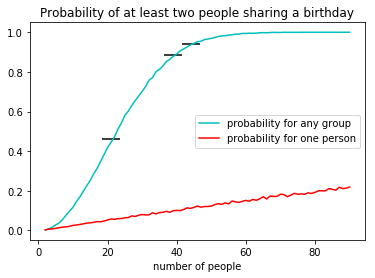

In [21]:
#create plot showing, how probability changes with increasing number of people
plt.plot(x,y, color='c', label='probability for any group')
plt.plot(x2,y2, color='red', label='probability for one person')
plt.scatter(x3,[y[x3[0]]-0.05,y[x3[1]]-0.02,y[x3[2]]-0.01], color='k', marker='_', s=300) #mark where probability surpasses certain values

#create title, labels and legend
plt.title('Probability of at least two people sharing a birthday')
plt.xlabel('number of people')
plt.legend()

#show the plot
plt.show()